In [1]:
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

labely na -1 1


In [2]:
#ustawienia
time_multiplicator = 100
seed = 244810
samples = 2410

In [3]:
XY,C  = datasets.make_classification(n_features=2,n_clusters_per_class=1,n_redundant=0,n_samples=samples, random_state=seed,  class_sep=2)

In [4]:
from sklearn.model_selection import train_test_split
XY_train, XY_test, C_train, C_test = train_test_split(XY, C, test_size=0.2, random_state=0)


In [5]:
#C_train = np.where(C_train==0, -1, C_train) 
#C_test = np.where(C_test==0, -1, C_test) 

In [6]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))


XY_train = norm(XY_train)
XY_test = norm(XY_test)
C_train = norm(C_train)
C_test = norm(C_test)

In [7]:
#sklearn
sk_ridge_ans= linear_model.RidgeClassifier(alpha=2e-16).fit(XY_train,C_train)
sk_ridge_ans.coef_

array([[-0.45173958, -4.21119952]])

In [8]:
sk_pred = sk_ridge_ans.predict(XY_test)
metrics.accuracy_score(sk_pred, C_test)

0.9896265560165975

plt.figure(figsize=(12,6))
plt.scatter(XY_train[:, 0], XY_train[:, 1], c=C_train, marker="+", alpha=0.5)

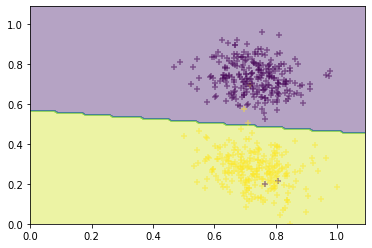

In [18]:
#magiczny kod do wyświetlania

mesh = np.meshgrid(np.arange(0, 1.1, 0.01), np.arange(0, 1.1, 0.01))[0]

predict = sk_ridge_ans.predict(np.c_[mesh.ravel(), mesh.T.ravel()]).reshape(mesh.shape)

plt.contourf(mesh, mesh.T, predict, alpha=0.4)
#plt.scatter(XY_train[:, 0], XY_train[:, 1], c=C_train, marker="+", alpha=0.5)
plt.scatter(XY_test[:, 0], XY_test[:, 1], c=C_test+1, marker="+", alpha=0.5)

In [10]:
#analityczna
def my_ridge(XY, C, k): 
    return np.linalg.pinv(XY.T @ XY + k * np.identity(len(XY.T))) @ XY.T @ C


In [11]:
my_ridge_ans = my_ridge(XY_train, C_train, 1e-100)
print(my_ridge_ans)
print(sk_ridge_ans.coef_)

[ 1.99928398 -1.85884819]
[[-0.45173958 -4.21119952]]


In [33]:
def my_prediction(theta, XY):
    Y_pred = XY @ theta
    mean = np.mean(Y_pred)
    print("mean",mean)
    ans = []
    for x in Y_pred:
        if x >= mean:
            ans.append(1.0)
        else:
            ans.append(0)
    
    return np.asarray(ans)

In [34]:
new = my_prediction(my_ridge_ans, XY_test)

mean 0.524774830457855


In [35]:
metrics.accuracy_score(new, C_test)

0.950207468879668

mean 0.07653750616492375


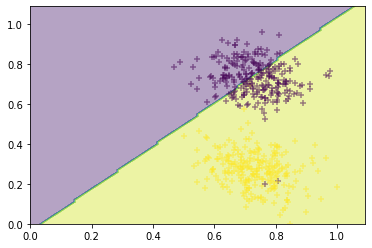

In [36]:
#magiczny kod do wyświetlania

mesh = np.meshgrid(np.arange(0, 1.1, 0.01), np.arange(0, 1.1, 0.01))[0]

asd = my_prediction(my_ridge_ans, np.c_[mesh.ravel(), mesh.T.ravel()]).reshape(mesh.shape)

plt.contourf(mesh, mesh.T, asd, alpha=0.4)

x = [0,1]
y=[0,0]
y[0] = sk_ridge_ans.coef_[0][1]*x[0] +sk_ridge_ans.coef_[0][0]
y[1] = sk_ridge_ans.coef_[0][1]*x[1] +sk_ridge_ans.coef_[0][0]

#plt.plot(x,y)
#plt.scatter(XY_train[:, 0], XY_train[:, 1], c=C_train, marker="+", alpha=0.5)
plt.scatter(XY_test[:, 0], XY_test[:, 1], c=C_test+1, marker="+", alpha=0.5)